In [3]:
import pandas as pd

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

# Description of the Dataset
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 USD
- PTRATIO - pupil-teacher ratio by town
- LSTAT - perc. lower status of the population
- MEDV - Median value of owner-occupied homes in 1000's USD

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Boxplot of "Median value of owner-occupied homes" 

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

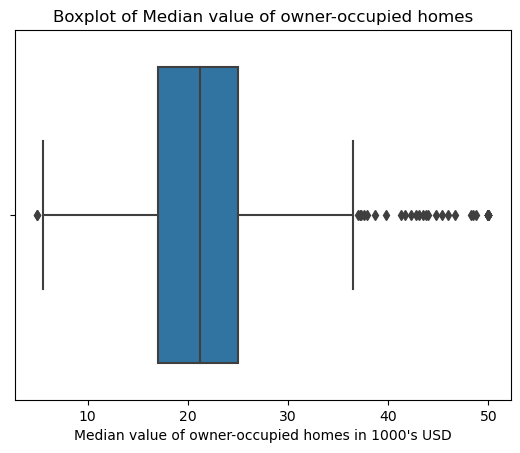

In [6]:
sns.boxplot(x = 'MEDV', data= boston_df)
plt.title("Boxplot of Median value of owner-occupied homes")
plt.xlabel("Median value of owner-occupied homes in 1000's USD")
plt.show()

The median value of owner-occupied homes is approximately 20,000 USD

# Provide a  bar plot for the Charles river variable

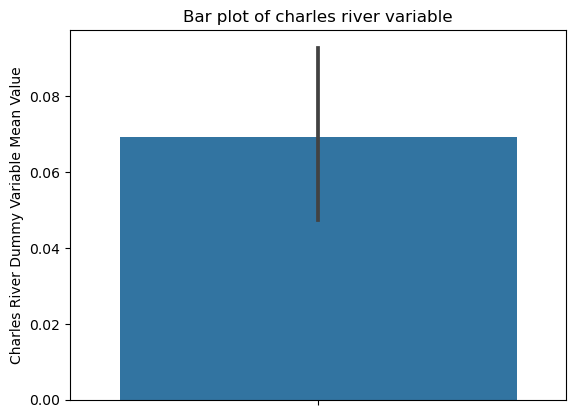

In [7]:
sns.barplot(y = 'CHAS', data= boston_df)
plt.title('Bar plot of charles river variable')
plt.ylabel('Charles River Dummy Variable Mean Value')
plt.show()

The frequency of tract bounding the charles river is 0.07.

In [8]:
chas_count_df = boston_df['CHAS'].value_counts().reset_index()
chas_count_df.columns = ['CHAS', 'Count']
chas_count_df.head()

,CHAS,Count
0,0.0,471
1,1.0,35


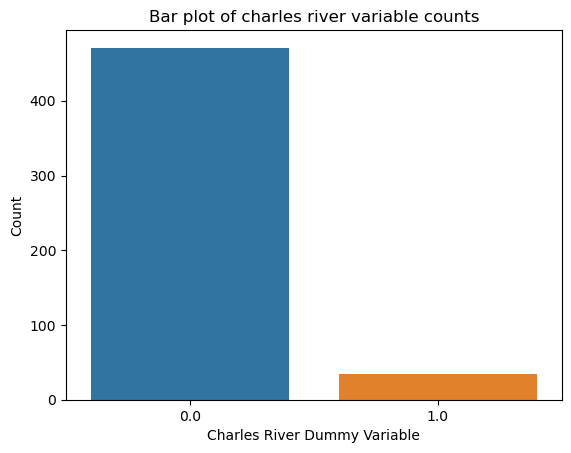

In [9]:
sns.barplot(x = 'CHAS', y = 'Count', data = chas_count_df)
plt.title('Bar plot of charles river variable counts')
plt.xlabel('Charles River Dummy Variable')
plt.show()

Most do not bound the charles river

# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [14]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'],
                                bins = [0, 35, 70, float('inf')],
                                labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older'],
                                right = False)

boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Between 35 and 70 years


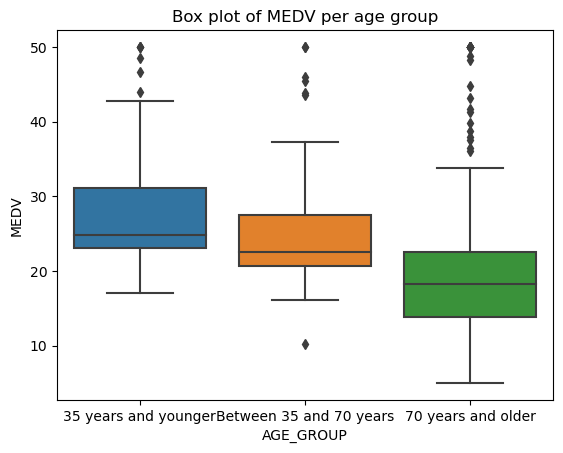

In [16]:
sns.boxplot(data = boston_df, x = 'AGE_GROUP', y = 'MEDV')
plt.title('Box plot of MEDV per age group')
plt.show()

The MEDV is highest for 35 years and younger age group, followed by the 35-70 age group. The 70+ group has the lowest MEDV value. 

# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

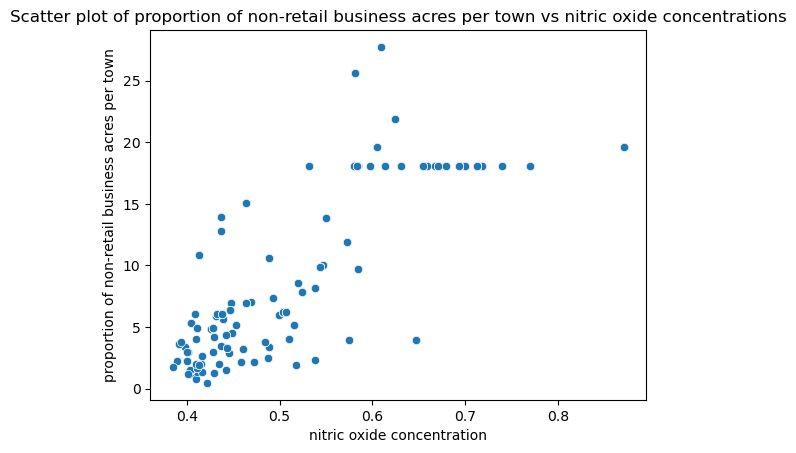

In [18]:
sns.scatterplot(data= boston_df, x = 'NOX', y = 'INDUS')
plt.title('Scatter plot of proportion of non-retail business acres per town vs nitric oxide concentrations')
plt.xlabel('nitric oxide concentration')
plt.ylabel('proportion of non-retail business acres per town')
plt.show()

There seems to be some positive correlation between NOX and INDUS variables

# Create a histogram for the pupil to teacher ratio variable

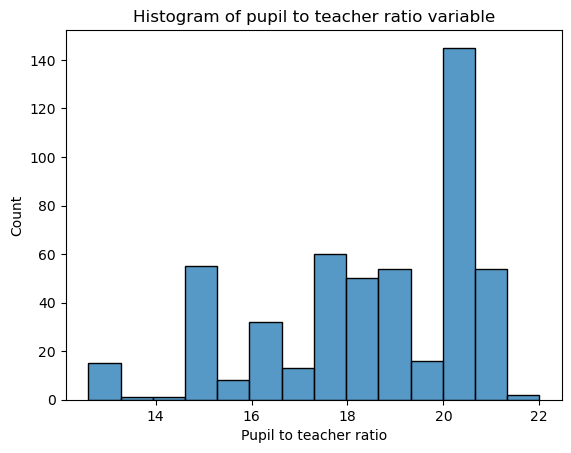

In [20]:
sns.histplot(data = boston_df, x = 'PTRATIO')
plt.title('Histogram of pupil to teacher ratio variable')
plt.xlabel('Pupil to teacher ratio')
plt.show()

# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
> The null hypothesis is there is no difference in median value, while the alternative hypothesis is there a difference

In [21]:
import scipy.stats

In [26]:
bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

scipy.stats.levene(bounded, not_bounded, center ='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

> The levene test shows the two sample population does not show equal variance

In [27]:
scipy.stats.ttest_ind(bounded, not_bounded)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Since the p value is well below alpha, we can reject the null hypothesis and claim that there is difference between the median values of houses bounded by the Charles river and that of those that are not.

# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
>The null hypothesis is there is no difference in median value, while the alternative hypothesis is there a difference

In [28]:
agegroup1 = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
agegroup2 = boston_df[boston_df['AGE_GROUP'] == 'Between 35 and 70 years']['MEDV']
agegroup3 = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

scipy.stats.f_oneway(agegroup1, agegroup2, agegroup3)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

Since the p value is well below alpha, we can reject the null hypothesis and claim that there is difference between the median values of houses amongst the age groups

# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
>The null hypothesis is there is no relationship between NOX and INDUS variables

In [29]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

Since the p value is well below alpha, we can reject the null hypothesis and claim that there is a correlation between NOX and INDUS

# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
> The null hypothesis is weighted distance to the five Boston employment centers has no effect on MEDV, and the alternative hypothesis is the weighted distance has an effetct

In [30]:
import statsmodels.api as sm

In [31]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        08:58:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Because the p-values are well below alpha, we can reject the null hypothesis. We can conclude that for each DIS unit MEDV increases by 1.0916.